## Car Sales Data
### Here, we plan to clean the data, relax assumptions, use log transformation, create our model and create dummies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels as sm
sns.set()

In [2]:
data = pd.read_csv('C:\\Users\\leno\\Desktop\\P\\Programming\\Jupyter\\ML Data\\Car_Sales_Data.csv')

In [3]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### we want to predict the price of a used car depending on its specification

In [4]:
data['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

In [5]:
len(data)

4345

#### The potential regressors are Brand, Mileage, Engine Volume and Year

### Preprocessing

In [6]:
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [7]:
data.drop('Model', axis = 1, inplace = True)
data.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with Missing values

In [8]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data.dropna(axis = 0)

In [10]:
data_no_mv.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

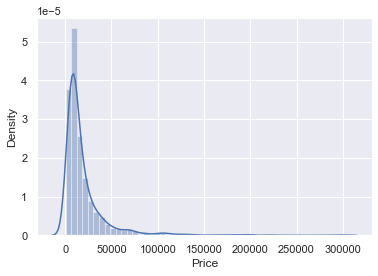

In [11]:
sns.distplot(data_no_mv['Price'])

#### We have few outliers as seen when comparing the mean and max of Price, so we are removing the top 1% of observations

### Dealing with Outliers

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_ = data_no_mv[data_no_mv['Price']<q]

In [13]:
data_.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


### Now the max of the Price is around 129,000 or the 99th percentile, no longer 300,000

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

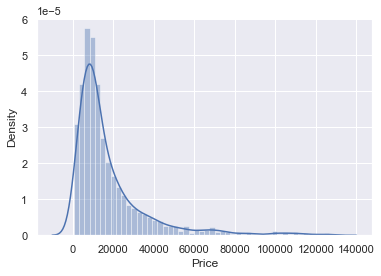

In [14]:
sns.distplot(data_['Price'])

### Mileage

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

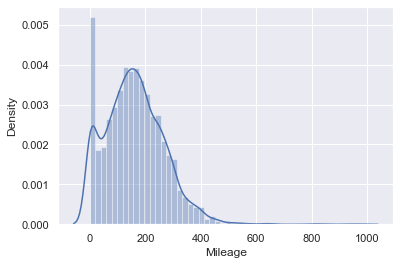

In [15]:
sns.distplot(data['Mileage'])

### The situation of Mileage is almost identical to Price from its PDF so we can tackle it the same way

In [16]:
r = data_['Mileage'].quantile(0.99)
data_b = data_[data_['Mileage']<r]
data_b.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


#### Now checking the PDF

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

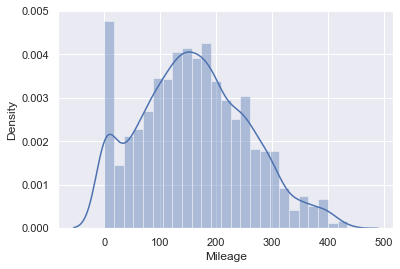

In [17]:
sns.distplot(data_b['Mileage'])

## check for outliers in Engine volume and years

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

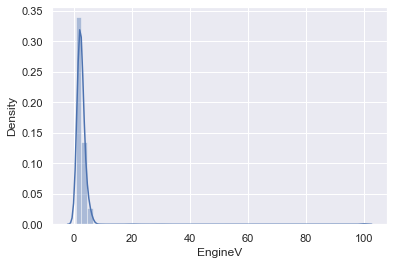

In [18]:
sns.distplot(data_no_mv['EngineV'])

### Engine Volume varies from around 2 to 6.5 so we limit it to 6.5

In [19]:
data_no_mv['EngineV']

0       2.0
1       2.9
2       5.0
3       4.2
4       2.0
       ... 
4339    1.6
4340    3.0
4341    3.5
4342    2.0
4344    2.0
Name: EngineV, Length: 4025, dtype: float64

In [20]:
data_3 = data_b[data_b['EngineV']<6.5]

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

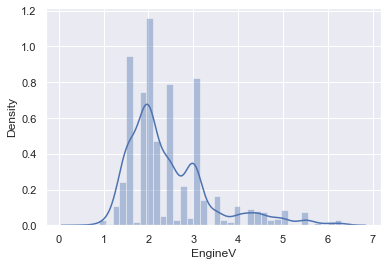

In [21]:
sns.distplot(data_3['EngineV'])

### For the years

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

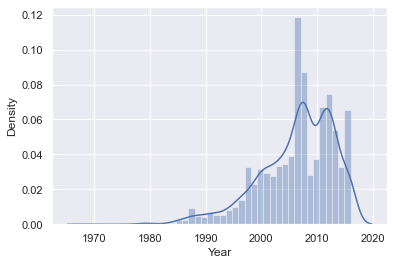

In [22]:
sns.distplot(data_no_mv['Year'])

In [23]:
g = data_3['Year'].quantile(0.01)

In [24]:
data_4 = data_3[data_3['Year']>g]

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

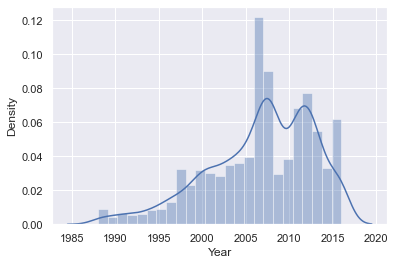

In [25]:
sns.distplot(data_4['Year'])

In [26]:
data_cleaned = data_4

In [27]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [28]:
data_cleaned.describe(include = 'all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Finally, the data has been cleaned

## OLS assumptions

### We now check if the data satisfies the assumptions
#### checking for linearity using scatter plots

### 1. Linearity

Text(0.5, 1.0, 'Mileage and Price')

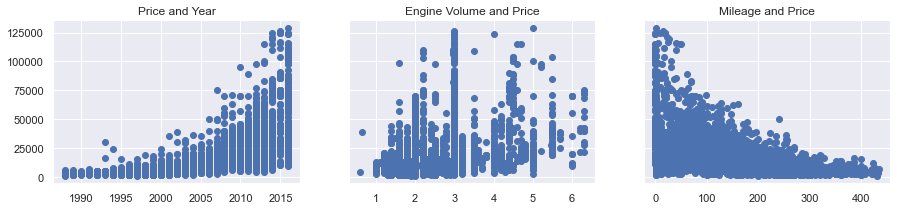

In [29]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title('Engine Volume and Price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title('Mileage and Price')

### we cannot run a linear regression immediately, we will first tranform one or more variables

#### recalling price PDF tells us that price is not normally distributed, and its relationship with the other normally distributed features is not linear but quite exponential

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

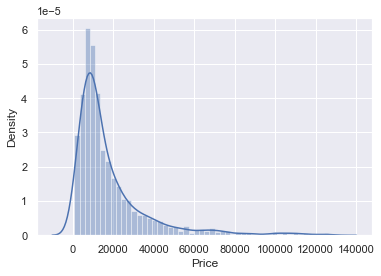

In [30]:
sns.distplot(data_cleaned['Price'])

### Log transformation will be used as it is very useful when facing exponential scatter plots

In [31]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

<ipython-input-31-ada018b02100>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['log_price'] = log_price


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
4338,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


### replotting the scatter plot, we can see a linear pattern in all plots now

Text(0.5, 1.0, 'Mileage and log_price')

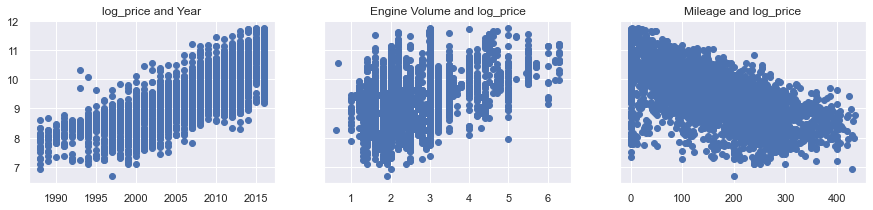

In [32]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title('log_price and Year')

ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title('Engine Volume and log_price')

ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title('Mileage and log_price')

### Here the regression lines will fit the data so much

In [33]:
data_cleaned.drop('Price', axis=1, inplace = True)

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\pandas\core\frame.py:4167: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
4338,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
4339,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
4340,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
4341,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


### 2. No Endogeneity assumption will be discussed until after the regression is created

### 3. Normality and Homoscedasticity

#### following CLT, normality is assumed for a big sample, zero mean is met with the inclusion of the intercept in the regression, homoscedasticity is also met as seen in the new scatter plot due to the implementation of log transformation 

### 4. No Autocorrelation
#### we are not putting so much efforts in that as our observations are not coming from time series or panel data (there are no reaseans for the observations to be dependent on each other)

### 5. Multicollinearity

#### note that year and millage are correlated. One of the best ways to check collinerity is through Variance inflation factor (VIF)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [36]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


#### when vif = 1, it means no Multicolinearity
#### when 1 <vif < 5, it is perfectly ok
#### when vif >10, it is unacceptable

### Year is too corelative with the other variables so we will remove it

In [37]:
data_no_multicollinearity = data_cleaned.drop('Year', axis = 1)

### Creating Dummy Variables

In [38]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)

In [39]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### checking the vif of the features including the dummies after dropping Audi

In [40]:
variables2 = data_with_dummies
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables2.values, i) for i in range(variables2.shape[1])]
vif['features'] = variables2.columns

#### ignore the target (log_price) or remove it because Multicollinearity deals only with the predictor variables

In [41]:
vif

,VIF,features
0,4.460434,Mileage
1,13.445639,EngineV
2,41.981260,log_price
3,2.603990,Brand_BMW
4,3.084356,Brand_Mercedes-Benz
5,1.830297,Brand_Mitsubishi
6,2.281498,Brand_Renault
7,2.406546,Brand_Toyota
8,3.312814,Brand_Volkswagen
9,1.583516,Body_hatch


### we want to rearrange the variables and have the target (log_price) first

In [42]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [43]:
col = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [44]:
data_preprocessed = data_with_dummies[col]

In [45]:
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


### Next, we standardize the data and make our regression

## Linear Regression

### Declaring our inputs and Targets

In [46]:
targets = data_preprocessed['log_price']
features = data_preprocessed.drop('log_price', axis = 1)

### Scaling the Data

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(features)

StandardScaler()

#### Recall that we use the Transform method to get the standardized inputs/features

In [48]:
features_scaled = scaler.transform(features)

#### Scaling has no effect on the predictive  power of dummies, once scaled, though, they lose all their dummy meaning 

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train, x_test, y_train, y_test = train_test_split(features_scaled, targets, test_size = 0.2, random_state = 100)

### Creating the Linear Regression

In [51]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

#### Infact this is not just a linear regression but a log-linear regression as our dependent variable is the log of Price. We can plot the predicted values against our observed values(Targets) to check the final results

### Obtaining our Predicted Values 

In [52]:
y_hat = reg.predict(x_train)

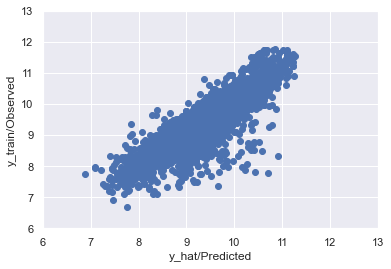

In [53]:
plt.scatter(y_hat, y_train)
plt.xlabel('y_hat/Predicted', fontsize = 12)
plt.ylabel('y_train/Observed',fontsize = 12)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### another check is the Residual Check (the difference between the targets and the predictions)

C:\Users\leno\anaconda3\envs\pandas\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Residual PDF')

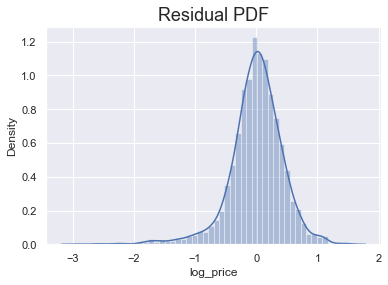

In [54]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size =18)

#### From the assumptions, we know that the errors should be normally distributed and have a mean of zero,since residuals are estimates of errors, we will expect the same from them as in the above

### Note: there is a much longer tail on the left side
#### it shows there are some observations for which the residuals are much lower than the mean which means those predictions tend to underestimate the target unlike the few ones on the right side that shows those ones rarely overestimate the targets

### R Square

In [55]:
reg.score(x_train, y_train)

0.7518053994065869

#### The R score tells that our model is explaining 75% of the variability of the data


### Getting the Weight and Bias

In [56]:
reg.coef_

array([-0.45846706,  0.20741479,  0.02116699,  0.0169147 , -0.14087559,
       -0.18515995, -0.05870992, -0.09481779, -0.15192672, -0.09654108,
       -0.19190346, -0.12489817, -0.15796265, -0.12323116, -0.0253148 ,
       -0.14907953,  0.32119156])

In [57]:
reg.intercept_

9.416548185393523

In [58]:
reg_summary = pd.DataFrame(features.columns.values, columns = ['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.458467
1,EngineV,0.207415
2,Brand_BMW,0.021167
3,Brand_Mercedes-Benz,0.016915
4,Brand_Mitsubishi,-0.140876
5,Brand_Renault,-0.185160
6,Brand_Toyota,-0.058710
7,Brand_Volkswagen,-0.094818
8,Body_hatch,-0.151927
9,Body_other,-0.096541


In [78]:
abs(reg_summary['Weights']).max()

0.4584670550144781

#### The bigger the weight, the bigger the impact, Mileage is the most prominent feature in this regression

## Quick Insights

### A positive weight shows that as a feature increases, the log_price and price increases, e.g. Engine Volume
### Vise versa for a negative weight e.g. Mileage

#### when creating the dummies, we dropped Audi so Audi is the benchmark. So when all other brands are 0, Audi is 1

### Dummy Variable

#### A positive weight shows the respective category (in this case,brand) is more expensive than Audi, and for negative, vise versa
#### BMW and Benz are more expensive than Audi unlike toyota and the rest

### Note that we can't be completely sure that a Benz is more expensive than an Audi since its very close to zero after being scaled

#### we can check the other dummies, we display the other categories and identify which is the benchmark

## ....

## Testing

In [59]:
y_hat_test = reg.predict(x_test)

#### including alpha also to show the proportional opacity

(6.0, 13.0)

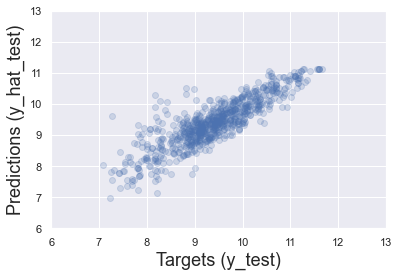

In [60]:
plt.scatter(y_test, y_hat_test,alpha = 0.2)
plt.xlabel('Targets (y_test)', fontsize = 18)
plt.ylabel('Predictions (y_hat_test)',size = 18)
plt.xlim(6,13)
plt.ylim(6,13)

#### for higher prices our model is very good at its prediction unlike for lower prices

### Exploring what the argument came up with

In [61]:
df_pred = pd.DataFrame(y_hat_test, columns = ['Prediction'])

In [62]:
df_pred.head()

,Prediction
0,8.843189
1,8.914625
2,9.932962
3,10.336926
4,9.566683


#### these are the log prices predictions and we prefer the predictions expressed as prices instead, since log is the opposite of exponential we will include it below

In [63]:
df_p = pd.DataFrame(np.exp(y_hat_test), columns =['Prediction'])

In [64]:
df_p.head()

,Prediction
0,6927.046618
1,7439.991841
2,20598.271993
3,30851.059882
4,14280.969104


In [65]:
df_p['Target'] = np.exp(y_test)
df_p

,Prediction,Target
0,6927.046618,4200.0
1,7439.991841,NaN
2,20598.271993,NaN
3,30851.059882,NaN
4,14280.969104,18300.0
...,...,...
769,11935.438261,NaN
770,22130.089353,NaN
771,11381.004449,NaN
772,8971.358397,NaN


In [66]:
y_test

1411     9.259131
2969     8.895630
2711     9.200290
3970    10.645425
326      9.952278
          ...    
2513     9.350102
429     10.126591
450      9.417355
2740     9.137770
866      9.082507
Name: log_price, Length: 774, dtype: float64

#### the issue is that y_test has indexes and pandas tried to match the indexes so we need to forget/drop them 

In [67]:
y_test = y_test.reset_index(drop = True)
y_test.head()

0     9.259131
1     8.895630
2     9.200290
3    10.645425
4     9.952278
Name: log_price, dtype: float64

### Overwriting the y_test

In [68]:
df_p['Target'] = np.exp(y_test)
df_p

,Prediction,Target
0,6927.046618,10500.0
1,7439.991841,7300.0
2,20598.271993,9900.0
3,30851.059882,42000.0
4,14280.969104,21000.0
...,...,...
769,11935.438261,11500.0
770,22130.089353,24999.0
771,11381.004449,12300.0
772,8971.358397,9300.0


#### Now that we have gotten our predictions and Targets, its time to compare

In [69]:
df_p['Residual'] = df_p['Target'] - df_p['Prediction']

#### Recall that the lower the error, the better the explanatory power

In [70]:
df_p['Difference%'] = np.absolute(df_p['Residual']/df_p['Target'] * 100)

In [71]:
df_p

,Prediction,Target,Residual,Difference%
0,6927.046618,10500.0,3572.953382,34.028127
1,7439.991841,7300.0,-139.991841,1.917696
2,20598.271993,9900.0,-10698.271993,108.063353
3,30851.059882,42000.0,11148.940118,26.545096
4,14280.969104,21000.0,6719.030896,31.995385
...,...,...,...,...
769,11935.438261,11500.0,-435.438261,3.786420
770,22130.089353,24999.0,2868.910647,11.476102
771,11381.004449,12300.0,918.995551,7.471509
772,8971.358397,9300.0,328.641603,3.533781


### To evaluate the aggregate perfomance, we can print the descriptive statistics

In [72]:
df_p.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16045.097474,17479.596563,1434.499089,38.381050
std,13003.024551,17344.674070,8248.688949,66.017934
min,1064.809274,1200.000000,-29580.014574,0.068170
25%,7736.654366,7300.000000,-2252.789979,12.489448
50%,11882.820351,11900.000000,274.725561,24.899109
75%,19652.702666,20975.000000,3709.679041,39.432348
max,67647.113315,114999.000000,48029.863336,940.307905


### The lower the Difference%, the better the prediction
#### A 75% percentile (of 39.6) under difference tells us most of our predictions got relatively close to our targets

### It is advisable to manually visit the dataframe

In [73]:
s = df_p.sort_values(by = 'Difference%')
s

,Prediction,Target,Residual,Difference%
48,30520.791733,30500.0,-20.791733,0.068170
407,13914.871195,13900.0,-14.871195,0.106987
662,10477.953886,10500.0,22.046114,0.209963
270,16761.410737,16800.0,38.589263,0.229698
619,36000.593998,35900.0,-100.593998,0.280206
...,...,...,...,...
584,36280.014574,6700.0,-29580.014574,441.492755
249,19844.563507,3500.0,-16344.563507,466.987529
357,23742.920973,3900.0,-19842.920973,508.792845
360,29444.003828,3500.0,-25944.003828,741.257252


### To see all rows, and change the dispay option for the floats to 2 digits after the dot

In [74]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda a: '%.2f' % a)
s

,Prediction,Target,Residual,Difference%
48,30520.79,30500.00,-20.79,0.07
407,13914.87,13900.00,-14.87,0.11
662,10477.95,10500.00,22.05,0.21
270,16761.41,16800.00,38.59,0.23
619,36000.59,35900.00,-100.59,0.28
532,8766.92,8800.00,33.08,0.38
106,9339.03,9300.00,-39.03,0.42
580,11633.97,11700.00,66.03,0.56
438,17606.31,17500.00,-106.31,0.61
363,12595.15,12500.00,-95.15,0.76


#### Going to the bottom we see that there are few predictions far from the targets, we noticed that the targets/observed prices are extremely low

#### for these last samples with high differences, our model is not decent at predicting the price. Another important note is that all our residuals from the last samples are negative which tells our predictions are higher than the target. A suggestion is, maybe we are missing a significant factor that drives the price lower

### The model we removed at the beginning of the analysis, maybe. It may also be an important information that was not given 

## To improve our model
#### 1. We can remove bigger parts of the outliers
#### 2. We can use different kinds of Transformations
#### 3. We can use different set of variables